In [2]:
import os
import sys
ROOT_DIR = os.path.dirname(os.path.abspath('..'))
sys.path.insert(0, os.path.abspath(ROOT_DIR))

%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
import seaborn as sns
import statsmodels
import sklearn

In [3]:
df = pd.read_csv('../data/raw/productivity_growth.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24442 entries, 0 to 24441
Data columns (total 17 columns):
LOCATION                 24442 non-null object
Country                  24442 non-null object
SUBJECT                  24442 non-null object
Subject                  24442 non-null object
MEASURE                  24442 non-null object
Measure                  24442 non-null object
TIME                     24442 non-null int64
Time                     24442 non-null int64
Unit Code                24442 non-null object
Unit                     24442 non-null object
PowerCode Code           24442 non-null int64
PowerCode                24442 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    24442 non-null float64
Flag Codes               150 non-null object
Flags                    150 non-null object
dtypes: float64(3), int64(3), object(11)
memory usage: 3.2+ MB


In [4]:
df.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,T_KSER,Total capital services,GRW,Annual growth/change,1985,1985,PC,Percentage,0,Units,NaN,NaN,5.122257,NaN,NaN
1,AUS,Australia,T_KSER,Total capital services,GRW,Annual growth/change,1986,1986,PC,Percentage,0,Units,NaN,NaN,4.945708,NaN,NaN
2,AUS,Australia,T_KSER,Total capital services,GRW,Annual growth/change,1987,1987,PC,Percentage,0,Units,NaN,NaN,4.964987,NaN,NaN
3,AUS,Australia,T_KSER,Total capital services,GRW,Annual growth/change,1988,1988,PC,Percentage,0,Units,NaN,NaN,5.063412,NaN,NaN
4,AUS,Australia,T_KSER,Total capital services,GRW,Annual growth/change,1989,1989,PC,Percentage,0,Units,NaN,NaN,4.829607,NaN,NaN


In [5]:
df['Subject'].unique()

array(['Total capital services', 'Multifactor productivity',
       'Capital deepening', 'GDP per hour worked, constant prices ',
       'Average hours worked per person employed',
       'Total employment (number of persons employed) ',
       'GDP per person employed, constant prices',
       'GDP per capita, constant prices ', 'Total hours worked',
       'Labour utilisation (=hours worked per head of population)',
       'Unit Labour Costs', 'Labour compensation per hour worked',
       'Labour compensation per employee',
       'Unit Labour Costs, employment based', 'ICT capital deepening',
       'ICT capital', 'Non-ICT capital deepening', 'Non-ICT capital',
       'Unit Labour Costs, USD exchange-rate adjusted',
       'Unit Labour Costs, employment based, USD exchange-rate adjusted'],
      dtype=object)

In [6]:
df['Measure'].unique()

array(['Annual growth/change'], dtype=object)

In [7]:
df['Time'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984], dtype=int64)

In [8]:
countries = df['Country'].unique()
countries

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Ireland', 'Italy', 'Japan', 'Korea',
       'Netherlands', 'New Zealand', 'Portugal', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'United States', 'Turkey',
       'Iceland', 'Israel', 'Slovenia', 'Czech Republic',
       'Slovak Republic', 'Chile', 'Russia', 'Luxembourg', 'Norway',
       'Poland', 'Mexico', 'Hungary', 'Estonia', 'South Africa', 'Greece',
       'Brazil', 'Latvia', 'European Union (28 countries)',
       'OECD - Total', 'G7', 'Colombia', 'Lithuania',
       'Euro area (19 countries)', 'Costa Rica'], dtype=object)

In [9]:
df1 = pd.read_csv('../data/raw/productivity_growth_by_industry.csv')
df1.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,ACTIVITY,Activity,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,I4_ANA_GVAHRS,"Gross value added per hour worked, constant pr...",GRW,Annual growth/change,A_U,Total,1995,1995,PC,Percentage,0,Units,NaN,NaN,3.166585,NaN,NaN
1,AUS,Australia,I4_ANA_GVAHRS,"Gross value added per hour worked, constant pr...",GRW,Annual growth/change,A_U,Total,1996,1996,PC,Percentage,0,Units,NaN,NaN,3.655702,NaN,NaN
2,AUS,Australia,I4_ANA_GVAHRS,"Gross value added per hour worked, constant pr...",GRW,Annual growth/change,A_U,Total,1997,1997,PC,Percentage,0,Units,NaN,NaN,3.077741,NaN,NaN
3,AUS,Australia,I4_ANA_GVAHRS,"Gross value added per hour worked, constant pr...",GRW,Annual growth/change,A_U,Total,1998,1998,PC,Percentage,0,Units,NaN,NaN,3.351160,NaN,NaN
4,AUS,Australia,I4_ANA_GVAHRS,"Gross value added per hour worked, constant pr...",GRW,Annual growth/change,A_U,Total,1999,1999,PC,Percentage,0,Units,NaN,NaN,0.971293,NaN,NaN


In [10]:
set(df1['Country'].unique()) == set(countries)

False

In [11]:
countries2 = df1['Country'].unique()
countries2

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom', 'Chile', 'Estonia',
       'Israel', 'Slovenia', 'South Africa', 'United States',
       'New Zealand', 'Latvia', 'European Union (28 countries)',
       'Ireland', 'Lithuania', 'Brazil', 'Euro area (19 countries)',
       'Costa Rica', 'Iceland', 'Colombia'], dtype=object)

In [12]:
df1['Subject'].unique()

array(['Gross value added per hour worked, constant prices',
       'Gross value added per person employed, constant prices',
       'Total employment (number of persons employed)',
       'Total hours worked', 'Average hours worked per person employed',
       'Unit Labour Costs', 'Labour compensation per hour worked',
       'Unit Labour Costs, employment based',
       'Labour compensation per employee',
       'Gross value added, constant prices'], dtype=object)

In [13]:
df1['Activity'].unique()

array(['Total ', 'Non-agriculture business sector excluding real estate',
       'Industry including energy', 'Manufacturing', 'Construction',
       'Business sector services excluding real estate',
       'Wholesale retail trade accommodation food services, transportation and storage',
       'Information and communication',
       'Financial and insurance activities',
       'Professional, scientific and technical activities, Administrative and support service activities',
       'Mining and utilities'], dtype=object)

In [44]:
df2 = pd.read_csv('../data/raw/lpc_by_industry.csv', low_memory=False)
df2.head()

,"U.S. Labor Productivity, Division of Industry Productivity Studies -August 27, 2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,Industry,Industry Sector,Industry Digit,Measure,Units,1987,1988,1989,1990,1991,...,2010.000,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018,2019
1,21 - Mining,21 - Mining,2-Digit,Labor productivity,1-Yr Rate,n.a.,2.300,-0.600,-2.300,1.600,...,-2.900,-11.100,0.500,8.900,5.300,17.600,18.600,3.400,3.300,5.400
2,21 - Mining,21 - Mining,2-Digit,Labor productivity,2007=100,107.834,110.344,109.663,107.141,108.893,...,107.977,95.963,96.407,104.952,110.476,129.881,154.047,159.312,164.561,173.428
3,21 - Mining,21 - Mining,2-Digit,Output,1-Yr Rate,n.a.,2.100,-0.600,1.100,-1.400,...,2.600,4.500,8.400,8.500,12.500,3.800,-4.900,4.000,12.300,8.200
4,21 - Mining,21 - Mining,2-Digit,Output,2007=100,104.291,106.506,105.879,107.038,105.493,...,103.232,107.844,116.879,126.855,142.722,148.216,140.885,146.471,164.505,177.916


In [45]:
df2.columns = df2.iloc[0]
df2.drop(df2.index[0], inplace=True)
df2.head()

,Industry,Industry Sector,Industry Digit,Measure,Units,1987,1988,1989,1990,1991,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018,2019
1,21 - Mining,21 - Mining,2-Digit,Labor productivity,1-Yr Rate,n.a.,2.300,-0.600,-2.300,1.600,...,-2.900,-11.100,0.500,8.900,5.300,17.600,18.600,3.400,3.300,5.400
2,21 - Mining,21 - Mining,2-Digit,Labor productivity,2007=100,107.834,110.344,109.663,107.141,108.893,...,107.977,95.963,96.407,104.952,110.476,129.881,154.047,159.312,164.561,173.428
3,21 - Mining,21 - Mining,2-Digit,Output,1-Yr Rate,n.a.,2.100,-0.600,1.100,-1.400,...,2.600,4.500,8.400,8.500,12.500,3.800,-4.900,4.000,12.300,8.200
4,21 - Mining,21 - Mining,2-Digit,Output,2007=100,104.291,106.506,105.879,107.038,105.493,...,103.232,107.844,116.879,126.855,142.722,148.216,140.885,146.471,164.505,177.916
5,21 - Mining,21 - Mining,2-Digit,Employment,thousands,709.300,706.200,685.400,701.000,679.000,...,678.500,760.300,816.500,827.300,861.300,782.400,635.300,638.500,690.600,699.000


In [46]:
# {col:type(col) for col in df2.columns}
ids = df2.iloc[:, 0:5].columns.tolist()
values = df2.iloc[:, 5:38].columns.tolist()
values = [str(int(i)) for i in values]
df2.columns = ids + values

In [47]:
df2 = pd.melt(df2, id_vars=ids, value_vars=values, var_name='Year')
df2.head()

,Industry,Industry Sector,Industry Digit,Measure,Units,Year,value
0,21 - Mining,21 - Mining,2-Digit,Labor productivity,1-Yr Rate,1987,n.a.
1,21 - Mining,21 - Mining,2-Digit,Labor productivity,2007=100,1987,107.834
2,21 - Mining,21 - Mining,2-Digit,Output,1-Yr Rate,1987,n.a.
3,21 - Mining,21 - Mining,2-Digit,Output,2007=100,1987,104.291
4,21 - Mining,21 - Mining,2-Digit,Employment,thousands,1987,709.300


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589842 entries, 0 to 589841
Data columns (total 7 columns):
Industry           525987 non-null object
Industry Sector    525987 non-null object
Industry Digit     525987 non-null object
Measure            525987 non-null object
Units              525987 non-null object
Year               589842 non-null object
value              525987 non-null object
dtypes: object(7)
memory usage: 31.5+ MB


In [53]:
df2.dropna(inplace=True)
df2.drop(columns=['Industry Digit'], inplace=True)
df2['Industry'] = df2['Industry'].str.replace('-', '').map(lambda s: ''.join([i for i in s if not i.isdigit()]))
df2['Industry Sector'] = df2['Industry Sector'].str.replace('-', '').map(lambda s: ''.join([i for i in s if not i.isdigit()]))

In [56]:
df2['value'] = df2['value'].replace('n.a.', np.nan)

In [63]:
df2['Industry Sector'].unique()

array(['  Mining', '  Utilities', ',,  Manufacturing',
       '  Wholesale Trade', ',  Retail Trade',
       ',  Transportation and Warehousing', '  Information',
       '  Finance and Insurance', '  Real Estate and Rental and Leasing',
       '  Professional, Scientific, and Technical Services',
       '  Administrative and Support and Waste Management and Remediation Services',
       '  Health Care and Social Assistance',
       '  Arts, Entertainment, and Recreation',
       '  Accommodation and Food Services',
       '  Other Services (except Public Administration)'], dtype=object)

In [58]:
def _regplot(df, country, subject):
    fig, ax = plt.subplots(figsize=(20,10))
    # locally weighted linear regression
    sns.regplot(x='Time', y='Value', lowess=True, scatter=False, data=df)
    # linear regression
    sns.regplot(x='Time', y='Value', scatter=False, data=df)
    sns.lineplot(x='Time', y='Value', data=df)
    plt.title(f'{country} Productivity Growth')
    plt.ylabel(f'Change in {subject}')

In [123]:
def collect_data(df, subject, activity=None) -> dict:
    countries = df['Country'].unique().tolist()
    df_cdict={}
    if activity is None:
        for c in countries:
            df_cdict[c] = df[
            (df['Country'] == c) & (df['Subject'] == subject) 
            ]
        return df_cdict
    else:
        for c in countries:
            df_cdict[c] = df[
                (df['Country'] == c) & (df['Subject'] == subject) & (df['Activity'] == activity)
            ]
        return df_cdict

In [139]:
df1[df1['Country'] == 'United States']['Activity'].unique()

array(['Total ', 'Construction', 'Financial and insurance activities',
       'Mining and utilities', 'Information and communication',
       'Manufacturing',
       'Non-agriculture business sector excluding real estate',
       'Professional, scientific and technical activities, Administrative and support service activities',
       'Business sector services excluding real estate',
       'Industry including energy',
       'Wholesale retail trade accommodation food services, transportation and storage'],
      dtype=object)

In [140]:
df1[df1['Country'] == 'United States']['Subject'].unique()

array(['Gross value added per hour worked, constant prices',
       'Gross value added per person employed, constant prices',
       'Total employment (number of persons employed)',
       'Total hours worked', 'Average hours worked per person employed',
       'Unit Labour Costs', 'Labour compensation per hour worked',
       'Unit Labour Costs, employment based',
       'Labour compensation per employee',
       'Gross value added, constant prices'], dtype=object)

In [149]:
c='United Kingdom'
subject='Gross value added per hour worked, constant prices'
activity='Information and communication'
t=df1[(df1['Country'] == c) & (df1['Subject'] == subject)]

In [89]:
def regplot(df, country, subject, activity=None):
    if activity is None:
        d = collect_data(df, subject)
        return _regplot(d[country], country, subject)
    else:
        d = collect_data(df, subject, activity)
        return _regplot(d[country], country, subject)

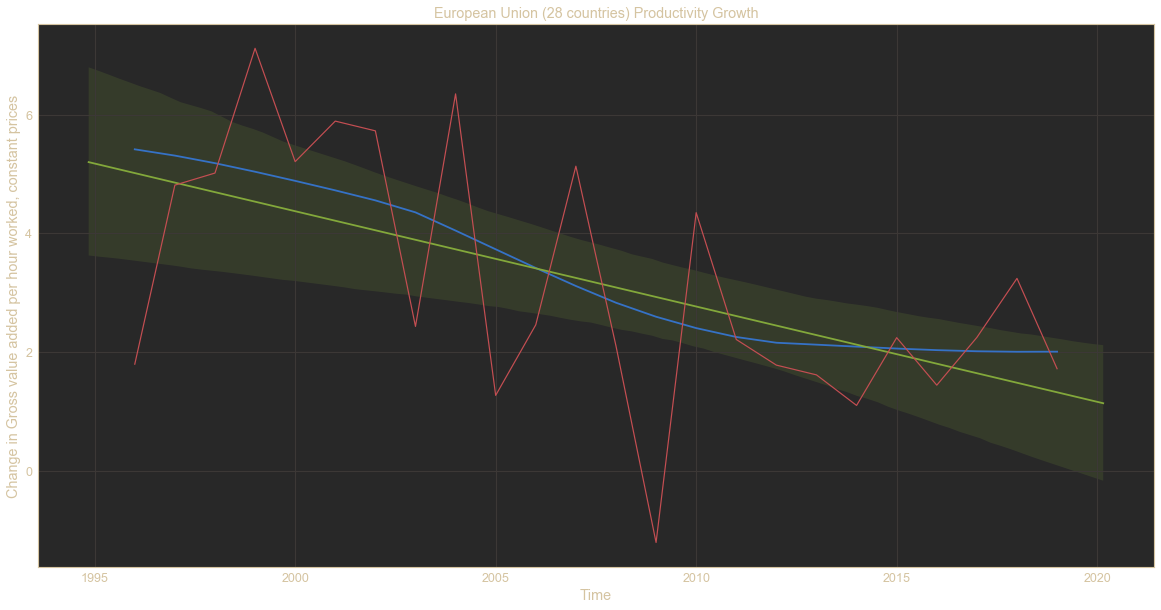

In [153]:
regplot(
    df1,
    country='European Union (28 countries)',
    subject='Gross value added per hour worked, constant prices',
    activity='Information and communication',
)

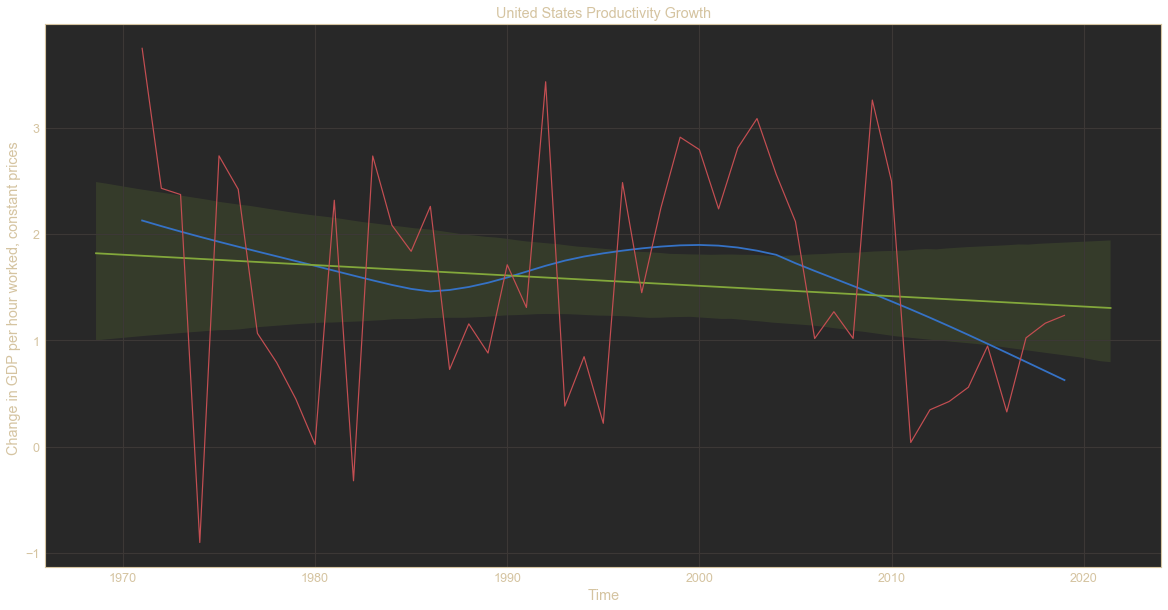

In [88]:
regplot(
    df, 
    country='United States', 
    subject='GDP per hour worked, constant prices '
)

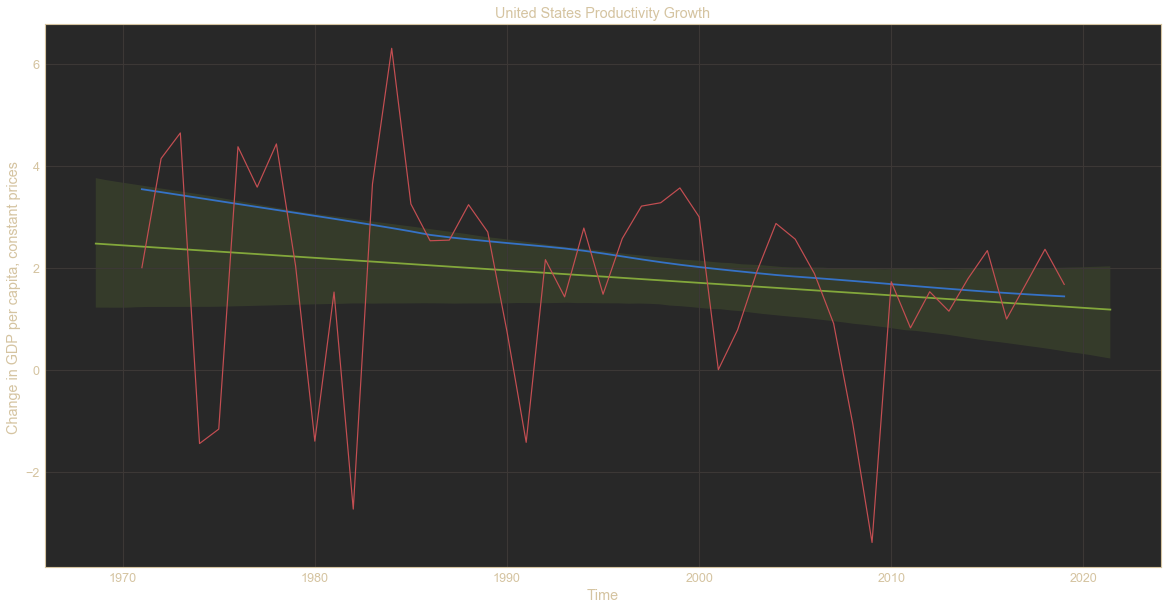

In [36]:
regplot(
    df, 
    country='United States', 
    subject='GDP per capita, constant prices '
)

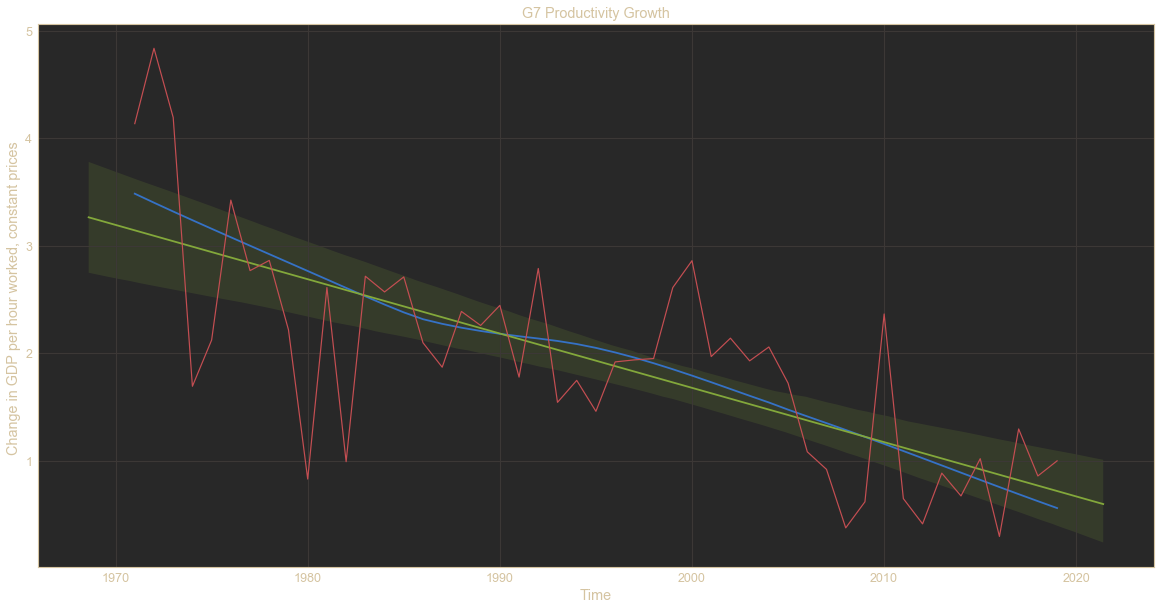

In [60]:
regplot(
    df, 
    country='G7', 
    subject='GDP per hour worked, constant prices '
)

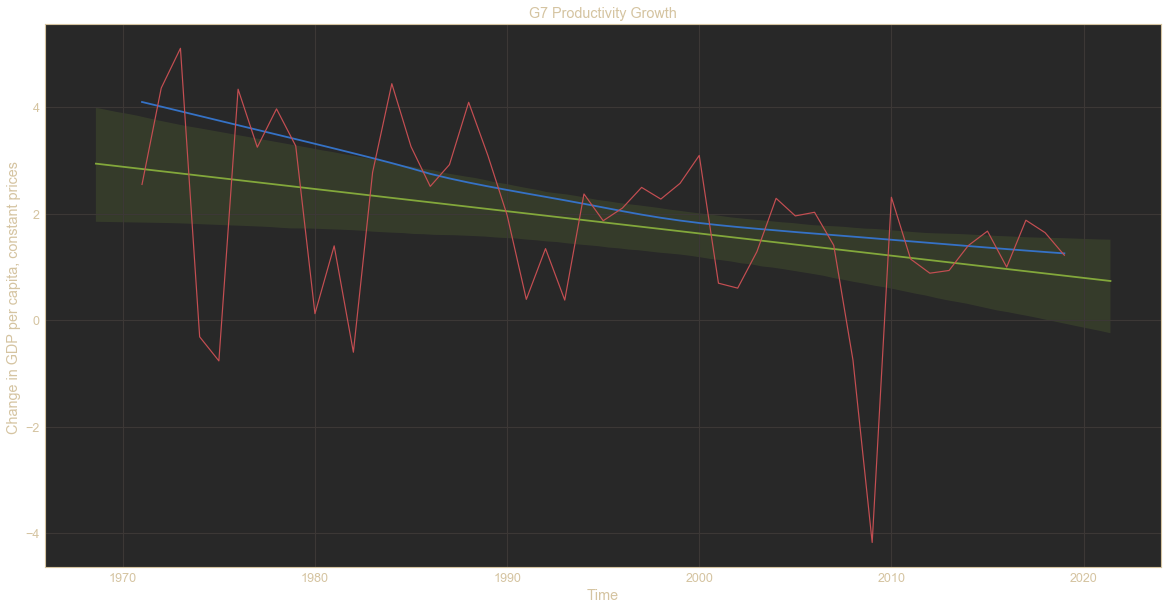

In [37]:
regplot(
    df, 
    country='G7', 
    subject='GDP per capita, constant prices '
)